# Healthy Options at Starbucks

## Intro

Adult obesity in the United States has risen from about 15% in the 1970s to over 40% today, meaning more than 2 in 5 adults are obese. Over the same period, average daily calorie intake increased by roughly 400–500 calories, driven largely by higher consumption of added sugars, ultra-processed foods, and sugary beverages.

As of late 2025, Starbucks has approximately over 17,100 locations in the United States, making them an accessible and convenient choice for consumers.

Is there anything Starbucks can do to mitigate the obesity epidemic?  Perhaps by targeting unhealthy choices, we can learn which drinks to avoid.

In [14]:
#Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load in Dataset

df_drinks_expanded = pd.read_csv('starbucks_drinkMenu_expanded.csv', encoding='latin-1')

In [16]:
# Confirm Data

df_drinks_expanded.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,CaffÃ¨ Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,CaffÃ¨ Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,CaffÃ¨ Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,CaffÃ¨ Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,CaffÃ¨ Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


## An Exploration of the Sugar Content and Calories across Beverage Category

From the DataFrame, one can see the nutritional information for Starbucks Beverages.  From exploring the sugar and caloric content, we can identify the unhealthy options and try to avoid those.

In [26]:
df_drinks_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [27]:
df_drinks_expanded['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino Blended Coffee', 'Frappuccino Light Blended Coffee',
       'Frappuccino Blended Cream'], dtype=object)

In [28]:
df_drinks_expanded['Beverage_category'] = df_drinks_expanded['Beverage_category'].str.replace('TazoÂ® Tea Drinks', 'Tazo Tea Drinks')
df_drinks_expanded['Beverage_category'] = df_drinks_expanded['Beverage_category'].str.replace('FrappuccinoÂ® Blended Coffee', 'Frappuccino Blended Coffee')
df_drinks_expanded['Beverage_category'] = df_drinks_expanded['Beverage_category'].str.replace('FrappuccinoÂ® Light Blended Coffee', 'Frappuccino Light Blended Coffee')
df_drinks_expanded['Beverage_category'] = df_drinks_expanded['Beverage_category'].str.replace('FrappuccinoÂ® Blended CrÃ¨me', 'Frappuccino Blended Cream')

In [29]:
print(df_drinks_expanded.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [30]:
df_drinks_expanded['Beverage_category'].value_counts()

Beverage_category
Classic Espresso Drinks             58
Tazo Tea Drinks                     52
Signature Espresso Drinks           40
Frappuccino Blended Coffee          36
Shaken Iced Beverages               18
Frappuccino Blended Cream           13
Frappuccino Light Blended Coffee    12
Smoothies                            9
Coffee                               4
Name: count, dtype: int64

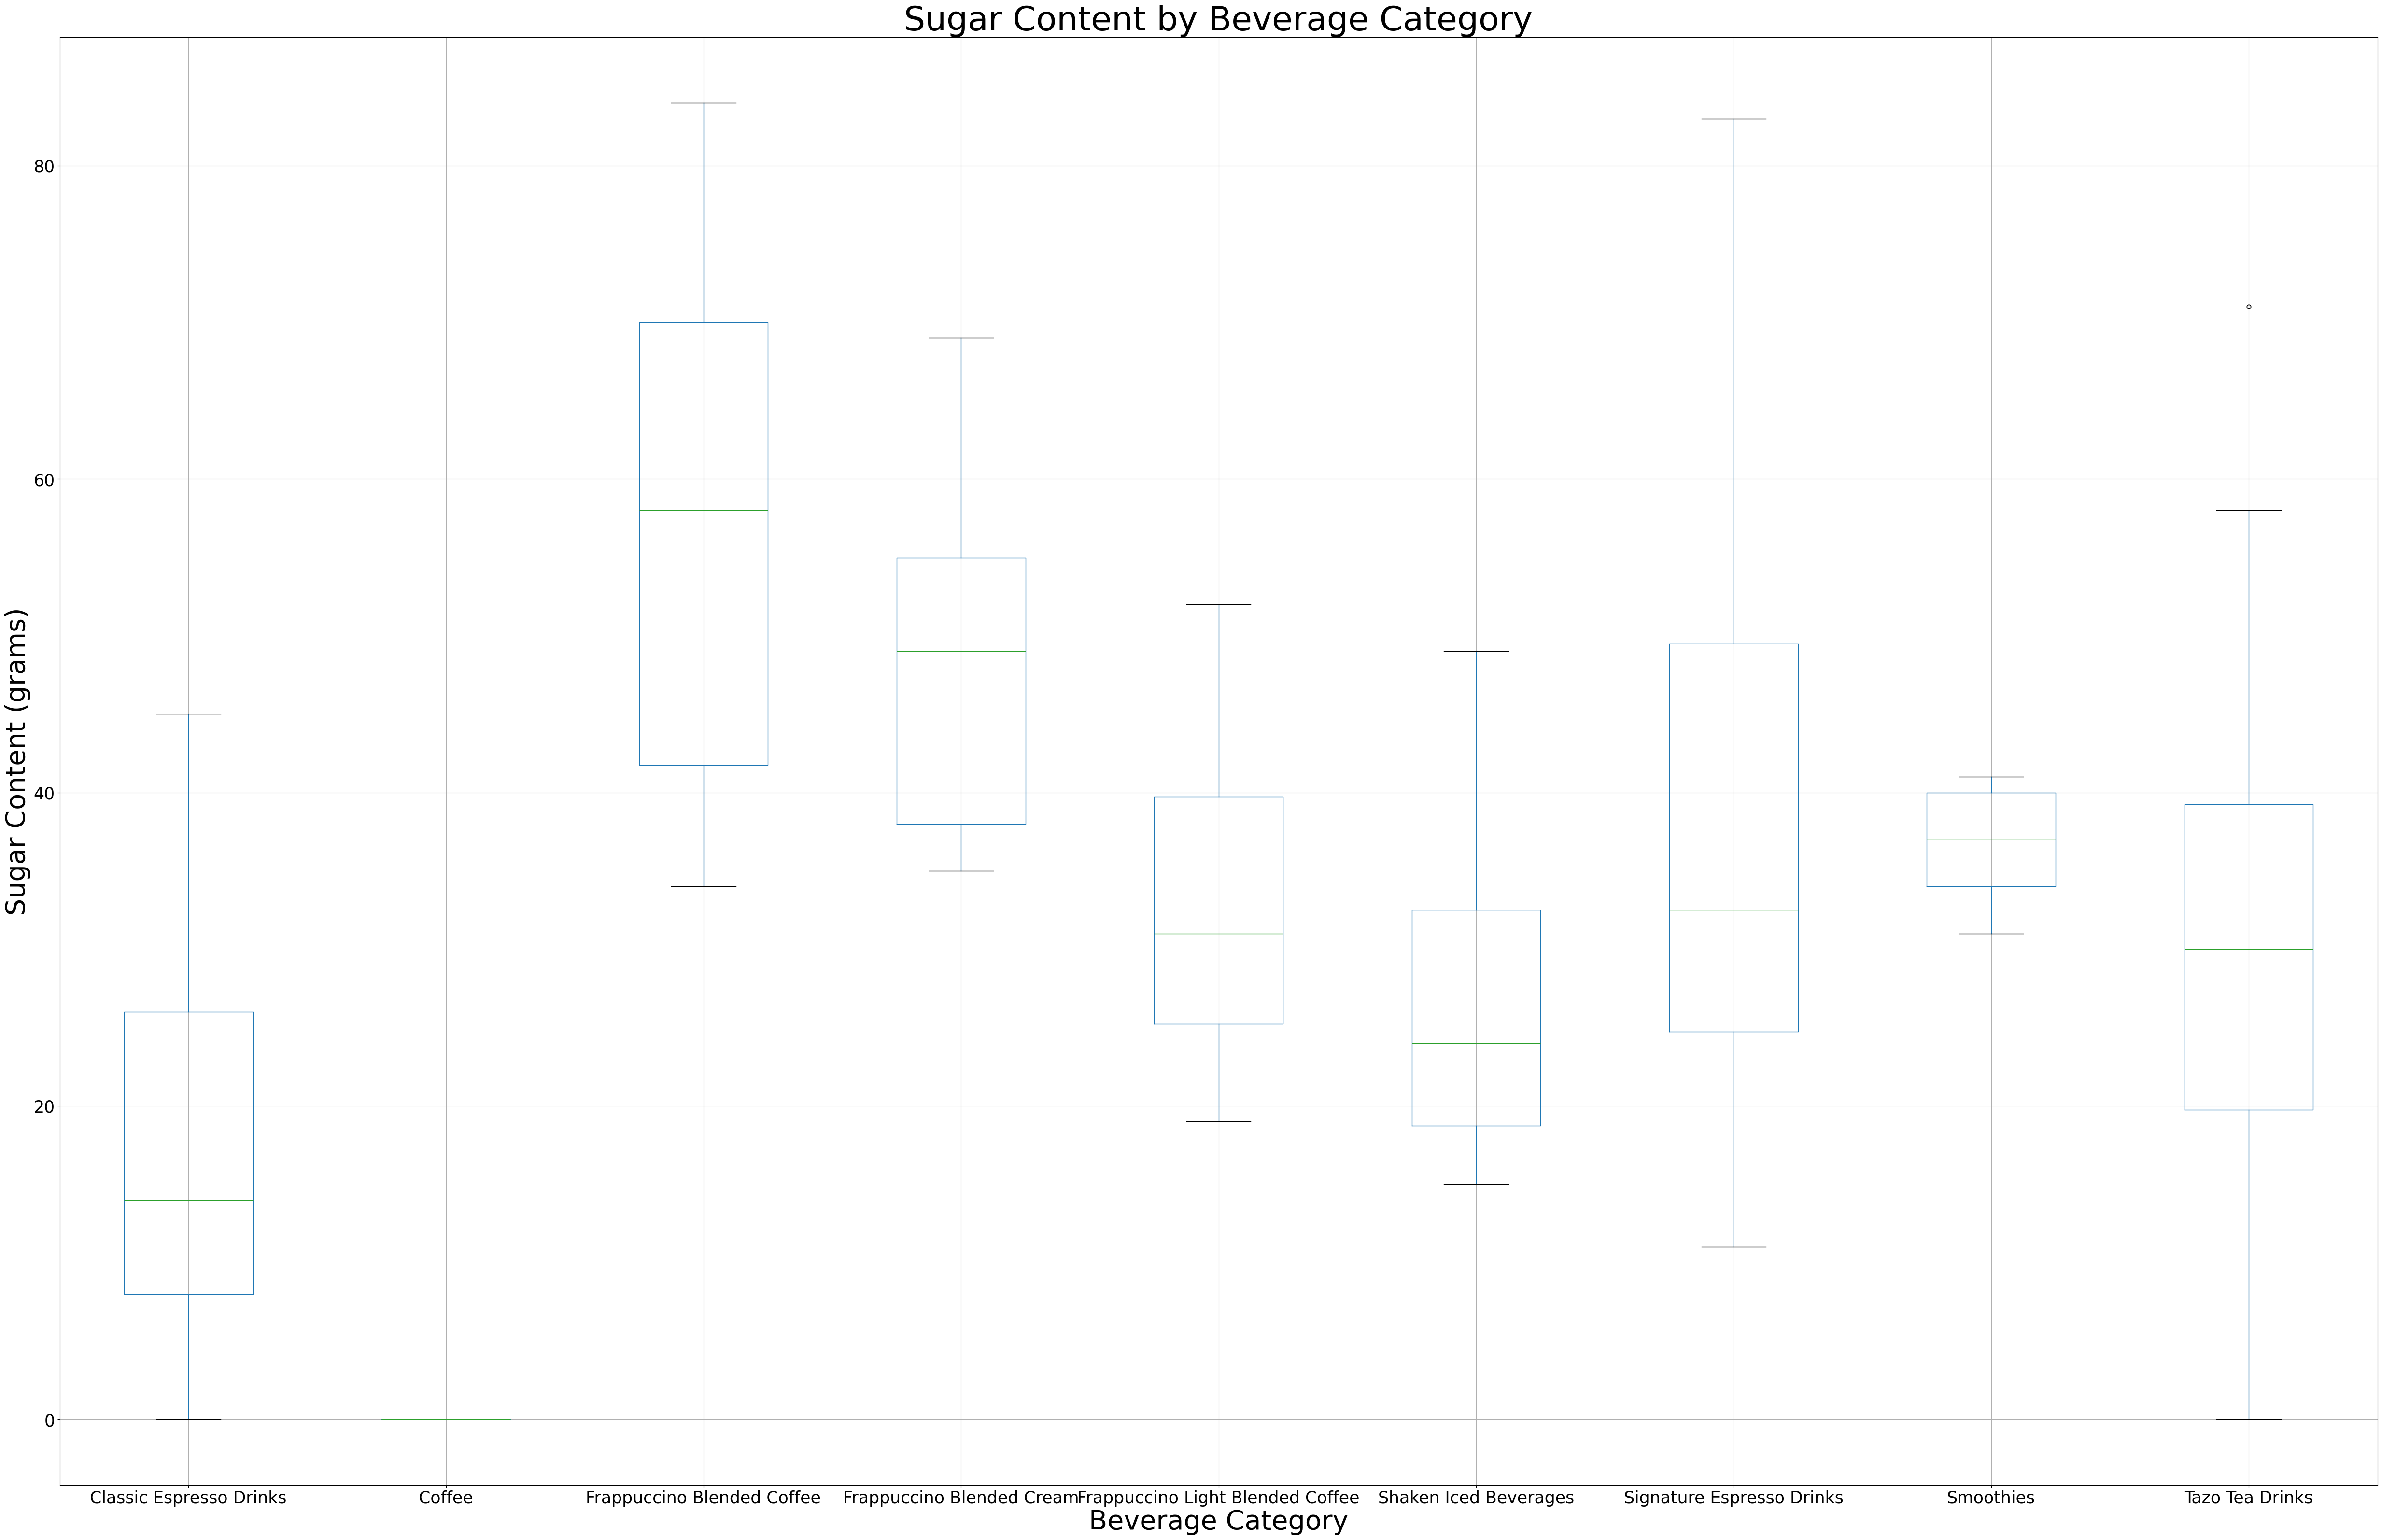

In [31]:
#Boxplot of sugars(g) by Drink Category


df_drinks_expanded.boxplot(column=' Sugars (g)', by='Beverage_category', figsize=(60, 40))

# 3. Enhance the plot 
plt.title('Sugar Content by Beverage Category', fontsize=50)
plt.suptitle('') # Suppress the default matplotlib title that overlaps
plt.xlabel('Beverage Category', fontsize = 40)
plt.ylabel('Sugar Content (grams)', fontsize = 40)
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25) 
plt.grid(True) 

# 4. Display the plot
plt.show()

This boxplot shows sugar content in Starbucks beverages. From the boxplot, one quickly understands the distribution and variability of sugar levels across drinks, as well as the average.  Coffee has next to no sugar, while blended Frappuccinos have the most sugar.  Smoothies are also sugar dense.

The next question that arises is which drink categories are the most sugar dense?

In [32]:
top_drinks = df_drinks_expanded.groupby('Beverage_category')[' Sugars (g)'].mean().nlargest(10)
print(top_drinks)

Beverage_category
Frappuccino Blended Coffee          57.083333
Frappuccino Blended Cream           48.461538
Signature Espresso Drinks           38.600000
Smoothies                           36.777778
Frappuccino Light Blended Coffee    32.416667
Tazo Tea Drinks                     30.307692
Shaken Iced Beverages               26.000000
Classic Espresso Drinks             16.965517
Coffee                               0.000000
Name:  Sugars (g), dtype: float64


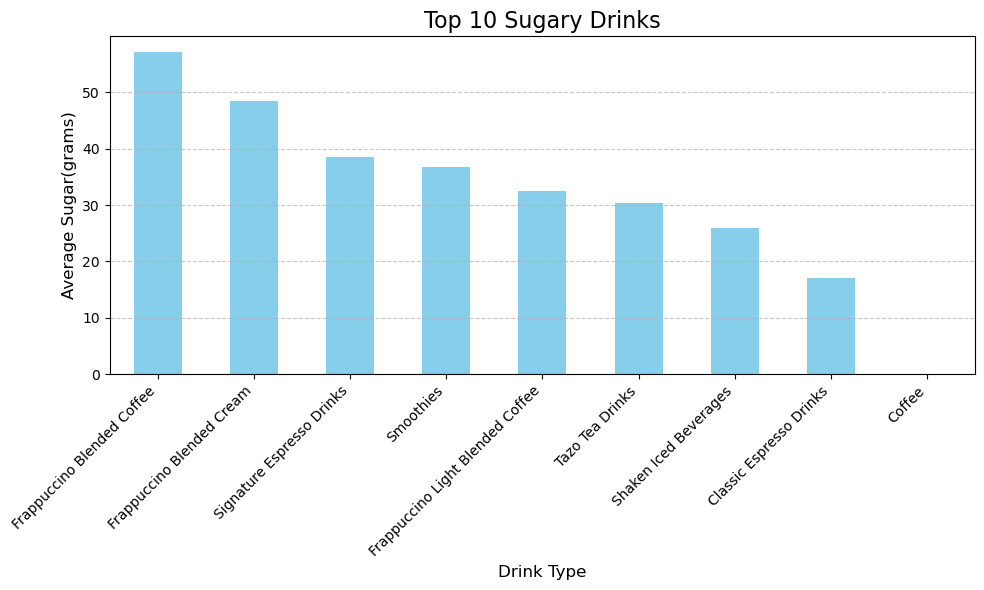

In [33]:
top_drinks.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Sugary Drinks', fontsize=16)
plt.xlabel('Drink Type', fontsize=12)
plt.ylabel('Average Sugar(grams)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout() # Adjust layout
plt.show()

From the barplot, one can see Frappucinos, Signature Espresso Drinks, and Smoothies being the most sugar-dense.  Coffee, Classic Espresso Drinks, and shaken iced beverages are the least sugar dense.  The next question to explore is: How does Caloric content correlate to sugar content?

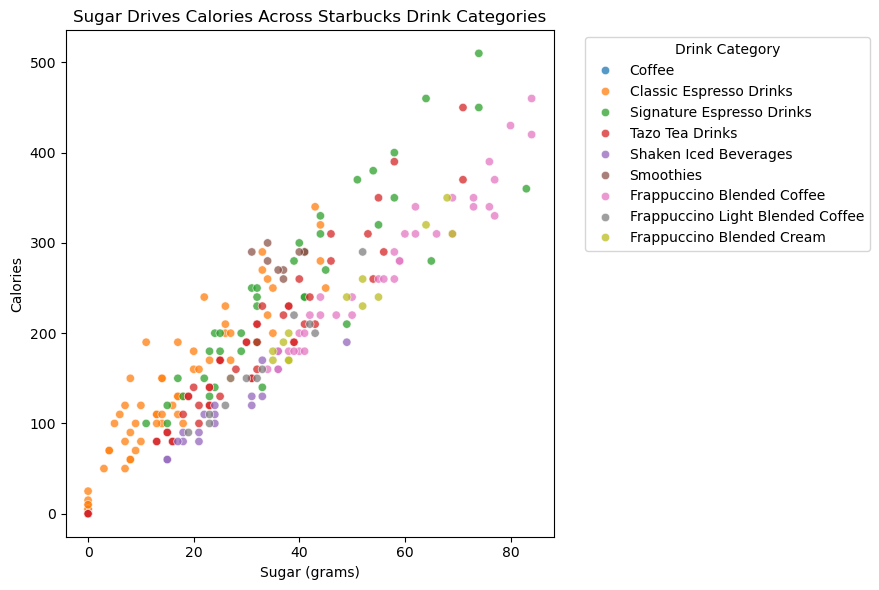

In [13]:
#Scatterplot of Sugar vs Calories via Beverage Category

plt.figure(figsize=(9,6))

sns.scatterplot(
    data=df_drinks_expanded,
    x=' Sugars (g)',
    y='Calories',
    hue='Beverage_category',
    alpha=0.75
)

plt.title('Sugar Drives Calories Across Starbucks Drink Categories')
plt.xlabel('Sugar (grams)')
plt.ylabel('Calories')
plt.legend(title='Drink Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

From this scatterplot one can see how sugar and calories are strongly correlated.  We can conclude that sugar dense drinks such as Frappucinos and Signature Espresso drinks contain more calories.  We can also see how Coffees, Classic Espressor Drinks, and Tazo Tea drinks are generally lower in both sugar and thus calories.

## Conclusion:

Starbucks drinks run the gamut from sugar-dense to sugar-free.  While several beverage options are highly caloric, there are also several options that are low-to-no sugar.  If Starbucks is going to mitigate American obesity, they should have more promotions for coffees and classic espresso drinks.  This would hopefully compel the consumer to choose a healthier option and save themselves from intaking an extra 300 unneccesary calories.